In [1]:
'''Replace Headers
Format data into a more readable format
Identify outliers and bad data
Find duplicates
Fix casing or inconsistent values
Conduct Fuzzy Matchin'''

'Replace Headers\nFormat data into a more readable format\nIdentify outliers and bad data\nFind duplicates\nFix casing or inconsistent values\nConduct Fuzzy Matchin'

In [1]:
import pandas as pd #import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import matplotlib.ticker as ticker
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from Levenshtein import distance
import datetime as dt
import numpy as np
from bs4 import BeautifulSoup
import requests
import json
import re 
import sqlite3 #import sqlite3 db

In [2]:
pd.set_option('display.max_columns', None) #show all columns of the data frame

In [3]:
#reading data from csv files
fl=(r"C:\Users\rdanda\OneDrive - Microsoft\Documents\Bellevue\DSC 540 Data Preparation\true_car_listings.csv")

In [4]:
df_c=pd.read_csv(fl) # Read the file in to dataframe

In [5]:
#df_c

In [6]:
df_c.columns=['PRICE','YEAR','MILEAGE','CITY','STATE','VIN','MAKE','MODEL'] #rename column names

In [7]:
#df_c

In [8]:
df_c.describe()

,PRICE,YEAR,MILEAGE
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [9]:
df_c['PRICEwc']=df_c.PRICE.apply(lambda x : "{:,}".format(x)) #Thousand seperator for Price (not inplace leaving it as )

In [10]:
df_c['MILAGEwc']=df_c.MILEAGE.apply(lambda x : "{:,}".format(x)) #Thousand seperator for Millage

In [11]:
#df_c

In [12]:
c_year = int(dt.datetime.now().year) #get current year

In [13]:
df_c['AGE_Calcuated']=c_year - df_c['YEAR'] #create new column AGE substracting year made to current year

In [14]:
#df_c

In [15]:
df_c.isnull().values.any() #Finding null values in datafram


False

In [16]:
df_c.isnull().sum() #counting null values in dataframe

PRICE            0
YEAR             0
MILEAGE          0
CITY             0
STATE            0
VIN              0
MAKE             0
MODEL            0
PRICEwc          0
MILAGEwc         0
AGE_Calcuated    0
dtype: int64

In [17]:
df_c.isnull().sum().sum() #total null values in datafram

0

In [18]:
#insert df_c in to database tables
dbfileloc=r"C:\Users\rdanda\OneDrive - Microsoft\Documents\Bellevue\DSC 540 Data Preparation\sqlitedbMS5"

In [19]:
conn_cs = sqlite3.connect(dbfileloc) #connecting to sqlitedbMS5 database for milestone 5

In [20]:
df_c.to_sql('df_c_tbl', conn_cs, if_exists='replace', index=False) #creating a df_c_tbl db table using df_c pandas dataframe
pd.read_sql('select * from df_c_tbl limit 5', conn_cs) #reding from the data base table for confirmation

,PRICE,YEAR,MILEAGE,CITY,STATE,VIN,MAKE,MODEL,PRICEwc,MILAGEwc,AGE_Calcuated
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,"8,995","35,725",6
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,"10,888","19,606",7
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,"8,995","48,851",7
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,"10,999","39,922",6
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,"14,799","22,142",4


In [21]:
#reading data from webpage in to dataframe and db tables
url='https://en.wikipedia.org/wiki/List_of_automobiles_manufactured_in_the_United_States'

In [22]:
html = requests.get(url).content
df_list = pd.read_html(html)
df_url=df_list[0]

In [23]:
df_url.columns

Index(['Manufacturer', 'Make', 'Model', 'State', 'Facility'], dtype='object')

In [24]:
#Replace Headers
df_url=df_url.rename(columns={'Manufacturer':'MANUFACTURER', 'Make':'MAKE', 'Model':'MODEL', 'State':'STATE', 'Facility':'FACILITY'})

In [25]:
#Format data into a more readable format
#Remove extra '[value]' in MANUFACTURER

df_url['MANUFACTURER']=df_url['MANUFACTURER'].apply(lambda x: x.split('[')[0])

In [26]:
df_url

,MANUFACTURER,MAKE,MODEL,STATE,FACILITY
0,BMW Group,BMW,X3,South Carolina,BMW US Manufacturing Company
1,BMW Group,BMW,X4,South Carolina,BMW US Manufacturing Company
2,BMW Group,BMW,X5,South Carolina,BMW US Manufacturing Company
3,BMW Group,BMW,X6,South Carolina,BMW US Manufacturing Company
4,BMW Group,BMW,X7,South Carolina,BMW US Manufacturing Company
...,...,...,...,...,...
107,Toyota Motor Corporation,Toyota,Tacoma,Texas,Toyota Motor Manufacturing Texas
108,Toyota Motor Corporation,Toyota,Tundra,Texas,Toyota Motor Manufacturing Texas
109,Volkswagen Group,Volkswagen,Atlas,Tennessee,Volkswagen Chattanooga Assembly Plant
110,Volkswagen Group,Volkswagen,Passat,Tennessee,Volkswagen Chattanooga Assembly Plant


In [27]:
df_url.to_sql('df_url_tbl', conn_cs, if_exists='replace', index=False) #creating a df_url_tbl db table using df_url pandas dataframe
pd.read_sql('select * from df_url_tbl', conn_cs) #reding from the data base table for confirmation

,MANUFACTURER,MAKE,MODEL,STATE,FACILITY
0,BMW Group,BMW,X3,South Carolina,BMW US Manufacturing Company
1,BMW Group,BMW,X4,South Carolina,BMW US Manufacturing Company
2,BMW Group,BMW,X5,South Carolina,BMW US Manufacturing Company
3,BMW Group,BMW,X6,South Carolina,BMW US Manufacturing Company
4,BMW Group,BMW,X7,South Carolina,BMW US Manufacturing Company
...,...,...,...,...,...
107,Toyota Motor Corporation,Toyota,Tacoma,Texas,Toyota Motor Manufacturing Texas
108,Toyota Motor Corporation,Toyota,Tundra,Texas,Toyota Motor Manufacturing Texas
109,Volkswagen Group,Volkswagen,Atlas,Tennessee,Volkswagen Chattanooga Assembly Plant
110,Volkswagen Group,Volkswagen,Passat,Tennessee,Volkswagen Chattanooga Assembly Plant


In [28]:
#api data pull in to datafrae and db tables

In [29]:
endpointurl = 'https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVINValuesBatch/'; #API end point
#getting data back in csv format by providing auto VIN numbers (a limit of 5-7 vins are allowed at a time before it times out erroring)
post_parameter_fields = {'format': 'csv', 'data':'KL4CJASB6HB002683;1G1ZE5ST1HF176666;JM3KE4DY2F0462173;YV4A22NLXH1006162;19UDE2F32GA001284;19VDE1F52DE012636;WAUBFAFL4EA074471;WBAVM1C57EVW50300;KL4CJASB9EB550348'};
r = requests.post(endpointurl, data= post_parameter_fields) #making the request with post to get constructor
#print(r.text) #reading the content of the contructor

In [30]:
location=r"C:\Users\rdanda\OneDrive - Microsoft\Documents\Bellevue\DSC 540 Data Preparation\csvfile.csv" #location of csv file to be written
with open(location,'w') as file: #writing csv file in 'w' mode
    for line in r.text: #reading one line at a time
        if line != '\n': #if not a new line 
            file.write(line) #write the line
        ##file.write('\n')
file.close() #close the csv file

In [31]:
df_api=pd.read_csv(location)

In [32]:
df_api=df_api.dropna(axis='columns',how='all' ) #drop columns with all values as null

In [33]:
c_year = int(dt.datetime.now().year) #get current year

In [34]:
df_api['AGE_Calcuated']=c_year - df_api['modelyear'] #create new column AGE substracting year made to current year

In [35]:
df_api=df_api.round(2) #ronding up the values to nearest 2 digits

In [36]:
df_api.to_sql('df_api_tbl', conn_cs, if_exists='replace', index=False) #creating a df_api_tbl db table using df_api pandas dataframe
pd.read_sql('select * from df_api_tbl limit 2', conn_cs) #reding from the data base table for confirmation

,makeid,modelid,vin,bedtype,bodycabtype,bodyclass,enginecylinders,displacementcc,displacementci,displacementl,doors,drivetype,enginemodel,enginekw,fueltypeprimary,gvwr,make,manufacturer,model,modelyear,plantcity,seats,series,steeringlocation,transmissionstyle,trim,vehicletype,windows,axles,brakesystemtype,airbagloccurtain,seatrows,valvetraindesign,transmissionspeeds,engineconfiguration,airbaglocfront,fueltypesecondary,fuelinjectiontype,airbaglocknee,enginehp,plantcountry,plantcompanyname,plantstate,pretensioner,seatbeltsall,abs,cib,blindspotmon,esc,tractioncontrol,forwardcollisionwarning,lanedeparturewarning,lanekeepsystem,rearvisibilitysystem,airbaglocside,wheelbaseshort,note,wheels,trailertype,trailerbodytype,wheelsizefront,wheelsizerear,otherrestraintsysteminfo,coolingtype,otherengineinfo,turbo,baseprice,topspeedmph,errorcode,enginemanufacturer,busfloorconfigtype,bustype,custommotorcycletype,motorcyclesuspensiontype,motorcyclechassistype,manufacturerid,tpms,dynamicbrakesupport,pedestrianautomaticemergencybraking,autoreversesystem,can_aacn,keylessignition,daytimerunninglight,semiautomaticheadlampbeamswitching,adaptivedrivingbeam,errortext,AGE_Calcuated
0,468,1842,KL4CJASB6HB002683,None,None,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,4,1400.0,85.43,1.4,4,FWD/Front Wheel Drive,"LUV MFI, VVT: Variable Valve Timing, ALUM, E85...",None,Gasoline,"Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)",BUICK,GENERAL MOTORS LLC,Encore,2017,BUPYEONG,5.0,Preferred,Left Hand Drive (LHD),Automatic,None,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,2.0,Hydraulic,All Rows,2.0,Dual Overhead Cam (DOHC),6.0,None,1st Row (Driver & Passenger),None,Multipoint Fuel Injection (MPFI),1st Row (Driver & Passenger),None,SOUTH KOREA,GM Korea,None,None,Manual,Standard,None,None,Standard,Standard,None,None,None,Standard,1st & 2nd Rows,100.6,None,4.0,Not Applicable,Not Applicable,18.0,18.0,None,None,None,Yes,24365.0,120.0,0,GME,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,984,Direct,Standard,None,Standard,Standard,Standard,Standard,Standard,None,0 - VIN decoded clean. Check Digit (9th positi...,3
1,467,1834,1G1ZE5ST1HF176666,Not Applicable,Not Applicable,Sedan/Saloon,4,1500.0,91.54,1.5,4,None,"LFV - DI: Direct Injection, VVT: Variable Valv...",None,Gasoline,None,CHEVROLET,GENERAL MOTORS LLC,Malibu,2017,FAIRFAX,5.0,LT (1LT),Left Hand Drive (LHD),None,None,PASSENGER CAR,4.0,2.0,None,All Rows,2.0,Dual Overhead Cam (DOHC),NaN,In-Line,1st Row (Driver & Passenger),None,None,1st Row (Driver & Passenger),None,UNITED STATES (USA),GMNA,KANSAS,None,Manual,Standard,Optional,Optional,Standard,Standard,Optional,Optional,Optional,Standard,1st & 2nd Rows,111.4,None,4.0,Not Applicable,Not Applicable,17.0,17.0,None,None,None,Yes,25125.0,130.0,0,GMNA,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,984,Direct,Standard,Optional,Standard,Standard,Standard,Standard,Standard,Optional,0 - VIN decoded clean. Check Digit (9th positi...,3


In [37]:
#DB tabel join btw csv df ad api df on VIN inner join
pd.read_sql('select df_api_tbl.* from df_api_tbl,df_c_tbl where df_api_tbl.vin=df_c_tbl.vin  limit 3', conn_cs)

,makeid,modelid,vin,bedtype,bodycabtype,bodyclass,enginecylinders,displacementcc,displacementci,displacementl,doors,drivetype,enginemodel,enginekw,fueltypeprimary,gvwr,make,manufacturer,model,modelyear,plantcity,seats,series,steeringlocation,transmissionstyle,trim,vehicletype,windows,axles,brakesystemtype,airbagloccurtain,seatrows,valvetraindesign,transmissionspeeds,engineconfiguration,airbaglocfront,fueltypesecondary,fuelinjectiontype,airbaglocknee,enginehp,plantcountry,plantcompanyname,plantstate,pretensioner,seatbeltsall,abs,cib,blindspotmon,esc,tractioncontrol,forwardcollisionwarning,lanedeparturewarning,lanekeepsystem,rearvisibilitysystem,airbaglocside,wheelbaseshort,note,wheels,trailertype,trailerbodytype,wheelsizefront,wheelsizerear,otherrestraintsysteminfo,coolingtype,otherengineinfo,turbo,baseprice,topspeedmph,errorcode,enginemanufacturer,busfloorconfigtype,bustype,custommotorcycletype,motorcyclesuspensiontype,motorcyclechassistype,manufacturerid,tpms,dynamicbrakesupport,pedestrianautomaticemergencybraking,autoreversesystem,can_aacn,keylessignition,daytimerunninglight,semiautomaticheadlampbeamswitching,adaptivedrivingbeam,errortext,AGE_Calcuated
0,468,1842,KL4CJASB6HB002683,None,None,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,4,1400.0,85.43,1.4,4,FWD/Front Wheel Drive,"LUV MFI, VVT: Variable Valve Timing, ALUM, E85...",None,Gasoline,"Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)",BUICK,GENERAL MOTORS LLC,Encore,2017,BUPYEONG,5.0,Preferred,Left Hand Drive (LHD),Automatic,None,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,2.0,Hydraulic,All Rows,2.0,Dual Overhead Cam (DOHC),6.0,None,1st Row (Driver & Passenger),None,Multipoint Fuel Injection (MPFI),1st Row (Driver & Passenger),None,SOUTH KOREA,GM Korea,None,None,Manual,Standard,None,None,Standard,Standard,None,None,None,Standard,1st & 2nd Rows,100.6,None,4.0,Not Applicable,Not Applicable,18.0,18.0,None,None,None,Yes,24365.0,120.0,0,GME,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,984,Direct,Standard,None,Standard,Standard,Standard,Standard,Standard,None,0 - VIN decoded clean. Check Digit (9th positi...,3
1,467,1834,1G1ZE5ST1HF176666,Not Applicable,Not Applicable,Sedan/Saloon,4,1500.0,91.54,1.5,4,None,"LFV - DI: Direct Injection, VVT: Variable Valv...",None,Gasoline,None,CHEVROLET,GENERAL MOTORS LLC,Malibu,2017,FAIRFAX,5.0,LT (1LT),Left Hand Drive (LHD),None,None,PASSENGER CAR,4.0,2.0,None,All Rows,2.0,Dual Overhead Cam (DOHC),NaN,In-Line,1st Row (Driver & Passenger),None,None,1st Row (Driver & Passenger),None,UNITED STATES (USA),GMNA,KANSAS,None,Manual,Standard,Optional,Optional,Standard,Standard,Optional,Optional,Optional,Standard,1st & 2nd Rows,111.4,None,4.0,Not Applicable,Not Applicable,17.0,17.0,None,None,None,Yes,25125.0,130.0,0,GMNA,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,984,Direct,Standard,Optional,Standard,Standard,Standard,Standard,Standard,Optional,0 - VIN decoded clean. Check Digit (9th positi...,3
2,473,2369,JM3KE4DY2F0462173,None,None,Wagon,4,2500.0,152.56,2.5,4,4WD/4-Wheel Drive/4x4,PY,None,Gasoline,"Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)",MAZDA,MAZDA MOTOR CORPORATION,CX-5,2015,HIROSHIMA,NaN,None,None,None,Grand Touring/GT,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,NaN,None,1st & 2nd Rows,NaN,Dual Overhead Cam (DOHC),NaN,In-Line,1st Row (Driver & Passenger),None,None,None,None,JAPAN,Mazda Motor Corporation,None,None,Manual,None,None,None,None,None,None,None,None,None,1st Row (Driver & Passenger),NaN,None,NaN,Not Applicable,Not Applicable,NaN,NaN,None,Water,None,None,NaN,NaN,0,Mazda,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,1041,Indirect,None,None,None,None,None,None,None,None,0 - VIN decoded clean. Check Digit (9th positi...,5


In [38]:
#joining all 3 data table in to on master table
conn_cs.execute("DROP TABLE IF EXISTS df_tbl");
conn_cs.execute('create table df_tbl as select ct.vin VIN_C,ct.make MAKE_C,ct.model MODEL_C, ct.MILEAGE MILEAGE_C,ct.price PRICE_C,ct.AGE_Calcuated,url.Manufacturer Manufacturer_U, url.Make MAKE_U, url.Model MODEL_U, url.State STATE_U, url.Facility FACILITY_U, api.bodyclass,api.enginecylinders,api.displacementcc,api.displacementci,api.displacementl,api.fueltypeprimary from df_url_tbl url,df_c_tbl ct left join df_api_tbl api on api.vin=ct.vin and   url.make=ct.make ')

In [39]:
#getting the contructor of the master DB table
sql_res=pd.read_sql('select * from df_tbl limit 60000', conn_cs) 

In [40]:
#Creating a smaller contructor of master DB table with csv data and calculated file of age of vehcile
sql_res1=pd.read_sql('select mileage_c,price_c,make_u,AGE_Calcuated from df_tbl where make_c=make_u limit 60000', conn_cs)

In [79]:
# #creating a groupby od DB data set from webpage and csv data
sql_res2=pd.read_sql('select count(*) cnt,MODEL_C from df_tbl where make_u="Acura" group by MODEL_C limit 20', conn_cs)

In [82]:
sql_res2

,cnt,MODEL_C
0,2185,1
1,170,124
2,5,1500
3,2815,15002WD
4,6755,15004WD
5,9460,1500Big
6,725,1500Express
7,8130,"1500Express,"
8,15,1500HFE
9,40,"1500HFE,"


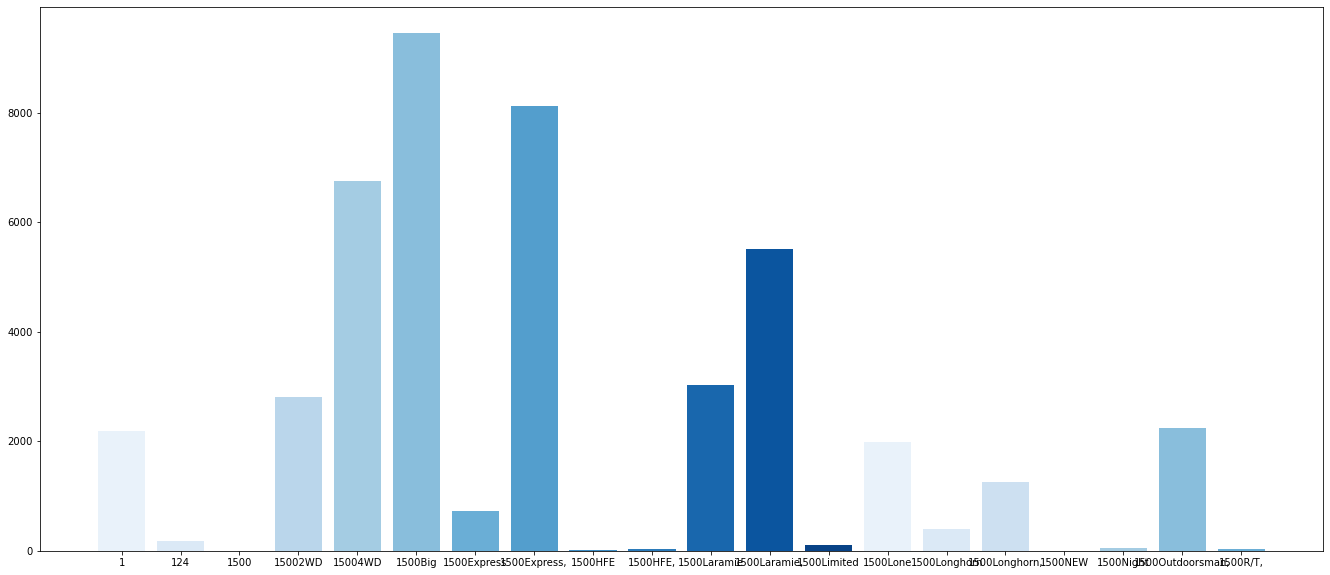

In [80]:
x=sql_res2.MODEL_C
y=sql_res2.cnt
plt.bar(x, y, color=sns.color_palette("Blues",13)) #bar plot models and counts of them using csv and website data
plt.show()

In [81]:
#sql_res

<Figure size 1440x1440 with 0 Axes>

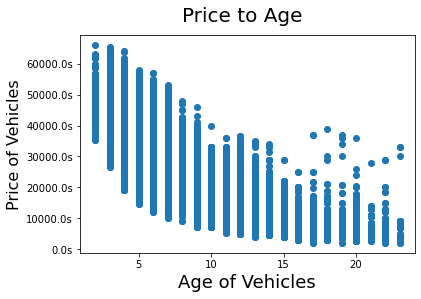

In [46]:
#price to age calculated on csv and webdata
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.scatter(sql_res1.AGE_Calcuated,sql_res1.PRICE_C)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1fs'))
fig.suptitle('Price to Age', fontsize=20)
plt.xlabel('Age of Vehicles', fontsize=18)
plt.ylabel('Price of Vehicles', fontsize=16)
plt.show()

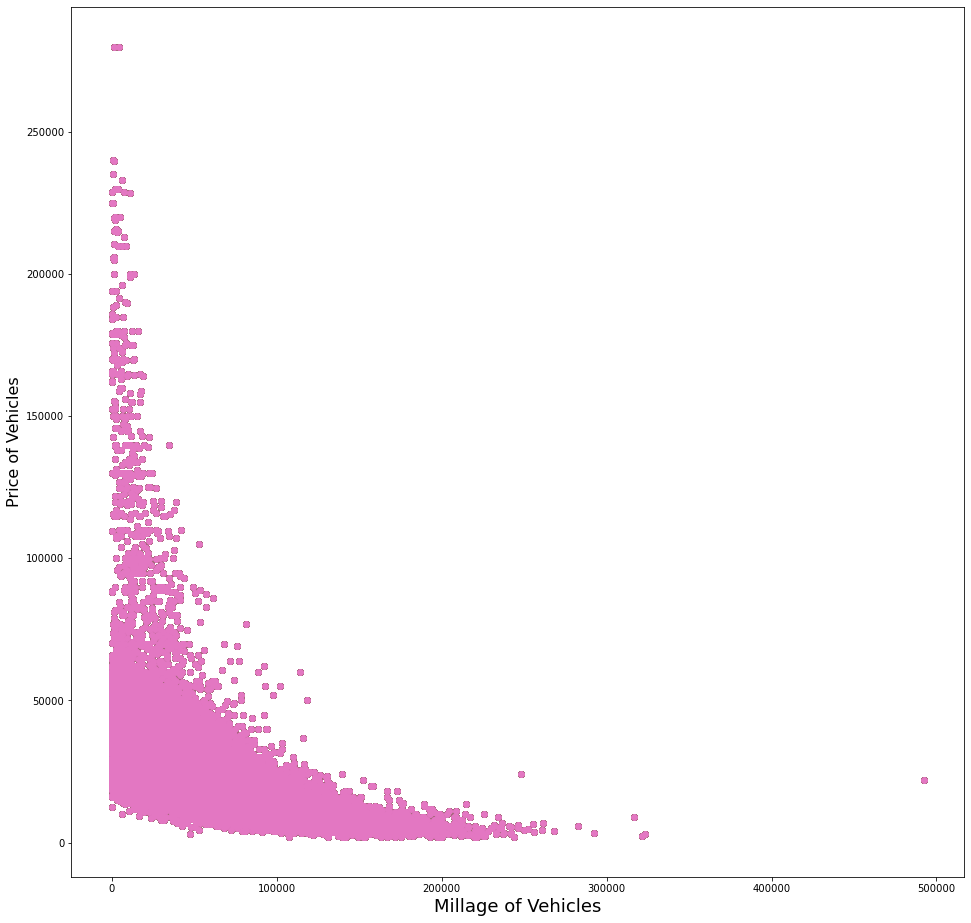

In [47]:
plt.figure(figsize=(16,16))
fig.suptitle('Millage to Price', fontsize=20)
plt.xlabel('Millage of Vehicles', fontsize=18)
plt.ylabel('Price of Vehicles', fontsize=16)
for rows in sql_res:
    plt.scatter(sql_res.MILEAGE_C,sql_res.PRICE_C) #Scatter plot dipicting millage to price from csv
   

<Figure size 1440x1440 with 0 Axes>

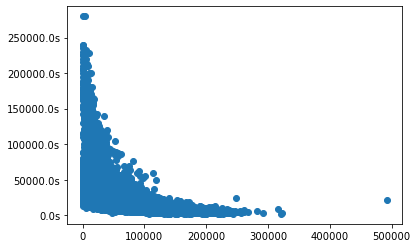

In [132]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.scatter(sql_res.MILEAGE_C,sql_res.PRICE_C)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1fs'))
plt.show()

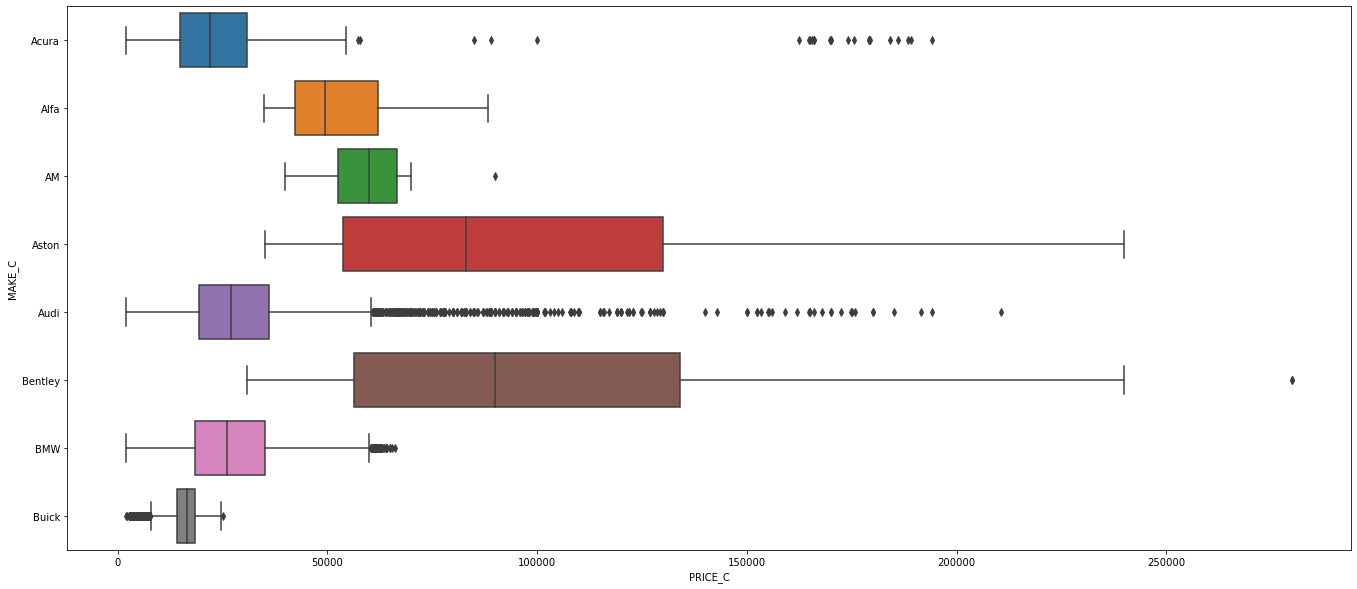

In [57]:
plt.rcParams['figure.figsize']=(23,10) #figure size 23,10
ax = sns.boxplot(x="PRICE_C", y="MAKE_C", data=sql_res) #boxplot for make and price

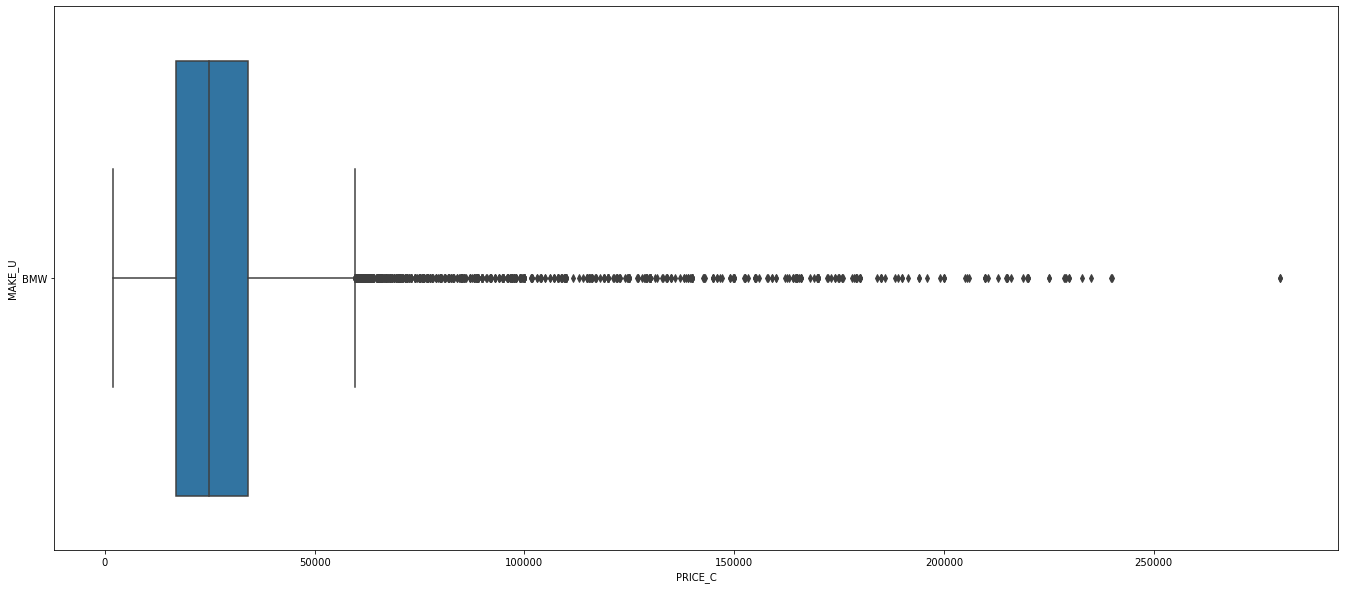

In [58]:
plt.rcParams['figure.figsize']=(23,10) #figure size 23,10
ax = sns.boxplot(x="PRICE_C", y="MAKE_U", data=sql_res) #boxplot for make and price for website and csv data

C:\Users\rdanda\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rdanda\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rdanda\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users

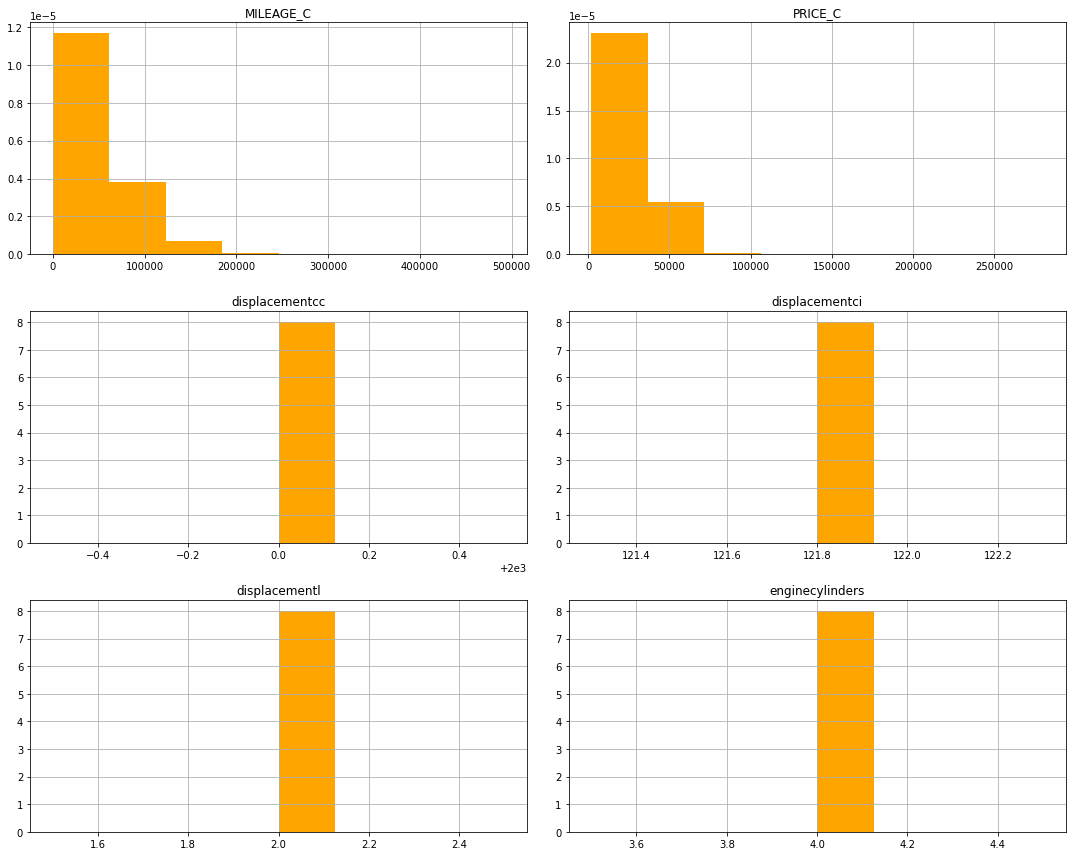

In [134]:
sql_res.hist(bins=8,figsize=(15,12), color='orange',density=True) #Histogram of milleage , price and year of cars
plt.tight_layout()

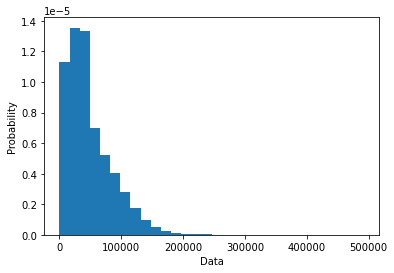

In [51]:

plt.hist(sql_res.MILEAGE_C, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

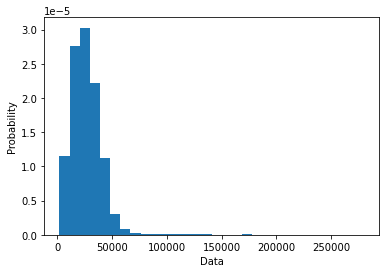

In [53]:
plt.hist(sql_res.PRICE_C, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');